# Import library

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import dataset

In [286]:
path = "C:/Users/julia/Downloads/Advertising.csv"
ad = pd.read_csv(path)
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [287]:
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [288]:
# drop the first columns, because it isthe index
ad1 = ad.copy()
ad1 = ad.drop(columns = 'Unnamed: 0')

# Analyze the dataset

In [289]:
# descriptiove of the dataset
ad1.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Start with the simple linear regression

In [290]:
# depart TV from the origianl dataset
TV = ad1.TV.values
# # do the same to Radio , Newspaper
Radio = ad1.Radio.values
Newspaper = ad1.Newspaper.values
Sales = ad1.Sales.values


## Self definition function

In [291]:
def plot(tv, sales):
  # change tv into 2 dimension
  sales1 = sales.reshape(-1, 1) 
  tv1 = tv.reshape(-1, 1)
  linear = LinearRegression()
  # fit the model 
  linear.fit(tv1, sales1)
  sns.scatterplot(x= tv, y = sales)
  sns.lineplot(x = tv, y = linear.predict(tv1).flatten(), color = 'red', errorbar= None)
  plt.show()
  # return the intercept and coefficient of linear regression
  linear_coff = np.array(list(linear.intercept_.flatten()) + list(linear.coef_.flatten()))
  return linear_coff

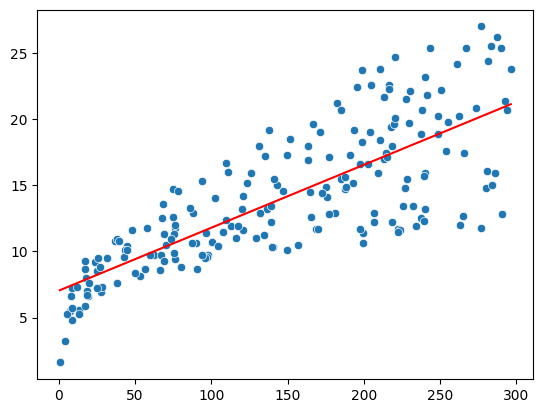

In [292]:
# find the linear relationship of TV and Sales
coefficient_TV = plot(TV, Sales)

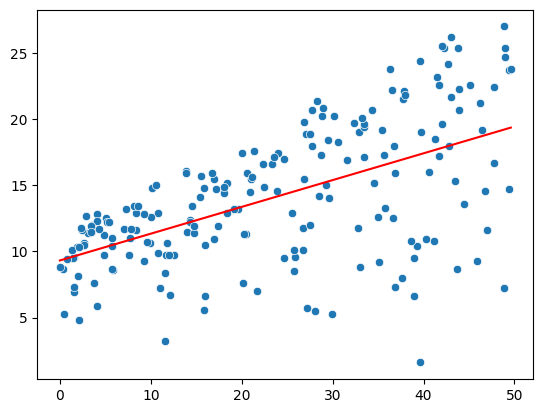

In [293]:
# find the linear relationship of Radio and Sales
coefflicent_Radio = plot(Radio, Sales)

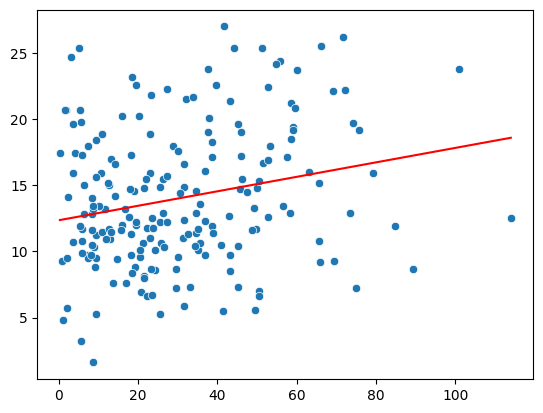

In [294]:
# find the linearregression of Newspaper and Sales
coefficient_Newspaper = plot(Newspaper, Sales)

In [295]:
print(coefficient_TV)
print(coefflicent_Radio)
print(coefficient_Newspaper)

[7.03259355 0.04753664]
[9.3116381  0.20249578]
[12.35140707  0.0546931 ]


In [296]:
# matric of coeffient of simple regression 
m = list(coefficient_TV) +list(coefflicent_Radio) + list(coefficient_Newspaper)
m = np.array(m)
m1 = m.reshape(3, -1)
materix = pd.DataFrame(data = m1, columns= ['Intercept','coef'], index= ['TV', 'Radio','Newspaper'])
materix

,Intercept,coef
TV,7.032594,0.047537
Radio,9.311638,0.202496
Newspaper,12.351407,0.054693


# Multiple Linear regression 

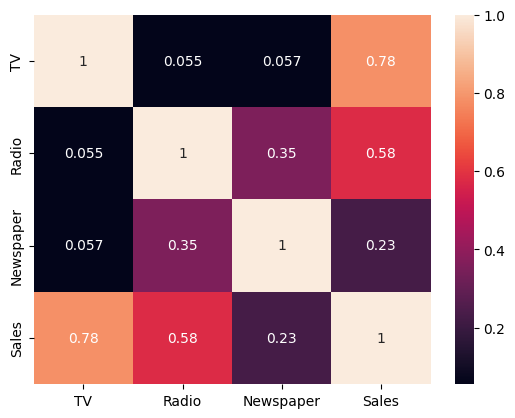

In [297]:
# find wether those independ variables has relation or not
# Don't need to standardize the data
# find correlation matrix 
sns.heatmap(ad1.corr(), annot= True)
plt.show()
# radio and newspaper has some relationship

In [298]:
# split the data into X and y
X = ad1[['TV','Radio','Newspaper']]
y = ad1.Sales

In [299]:
# first assume there are three variables in multiple linear regression, and fit the model
mlr = LinearRegression()
mlr.fit(X = X, y = y)
# write down the multiple linear regression 
liner_coef = list(mlr.intercept_.flatten().round(3)) + list(mlr.coef_.flatten().round(3))
variables = X.columns
target = f'{liner_coef[0]}'
for i in range(1, 4):
  if liner_coef[i] < 0:
    target = target + f' - {-liner_coef[i]} * {variables[i -1]}'
  else:
    target = target + f' + {liner_coef[i]} * {variables[i -1]}'
print(target)

2.939 + 0.046 * TV + 0.189 * Radio - 0.001 * Newspaper


In [300]:
# calculate the score of multiple linear regression 
score = mlr.score(X = X, y = y)

# OLS (statsmodel to get a more detailed model interpretation)

In [315]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [323]:
result = smf.ols(formula= 'Sales ~ TV + Radio + Newspaper', data = ad1).fit()
print(result.summary())
# from the t test table, we can see that Newspaper this variables is not significant important in linear regression 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.58e-96
Time:                        18:05:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [329]:
print('******Parameters****')
print(result.params)
print('******p-values****')
print(result.pvalues)
print('******standard errors****')
print(result.bse)

******Parameters****
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
******p-values****
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
******standard errors****
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64


# Model Evaluation: Cross validation, Bootstrapping